In [68]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display

sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="deep",
)

When you are searching for a new job, its helpful to have more than one offer on the table so you can use it in negotiations. If you have a 1/5 probablity of receiving a job offer when you interview, and you interview with 7 companies in a month, what is the probability you'll have at least two competing offers by the end of that month?

- Is this discrete? yes
- is this binary? Yes
- Distribution: binomial

,# of Job Offers,CDF,PMF
0,0,0.209715,0.209715
1,1,0.576717,0.367002
2,2,0.851968,0.275251
3,3,0.966656,0.114688
4,4,0.995328,0.028672
5,5,0.999629,0.004301
6,6,0.999987,0.000358
7,7,1.000000,0.000013


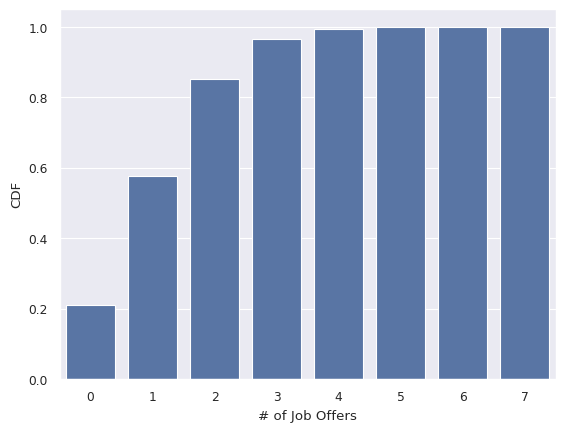

In [69]:
n = 7
p_joboffer = 0.2
dist_of_joboffers = stats.binom(n, p_joboffer)

# CDF graph
df = pd.DataFrame(
    {
        '# of Job Offers': range(n+1),
        'CDF': dist_of_joboffers.cdf(range(n+1)),
        'PMF': dist_of_joboffers.pmf(range(n+1))
    }
)
sns.barplot(data = df, x = '# of Job Offers', y = 'CDF')
display(df)

# PMF = P(X=x)
# CDF = P(X<=x)


<Axes: xlabel='# of Job Offers', ylabel='PMF'>

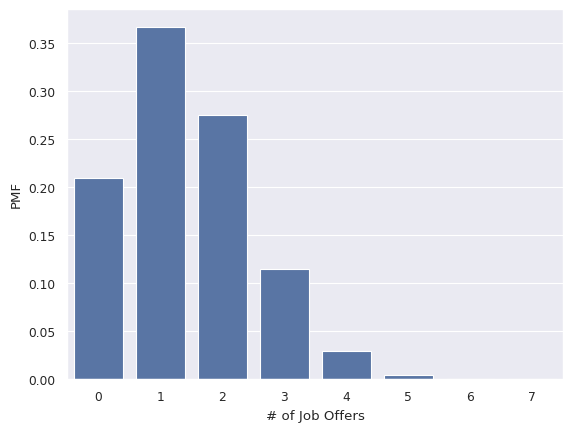

In [70]:
# PMF plot
sns.barplot(data = df, x = '# of Job Offers', y = 'PMF')

CDF @ N-1 = 0.5767167999999998
CDF @ N = 0.851968
0.4232832000000002
0.4232832000000001


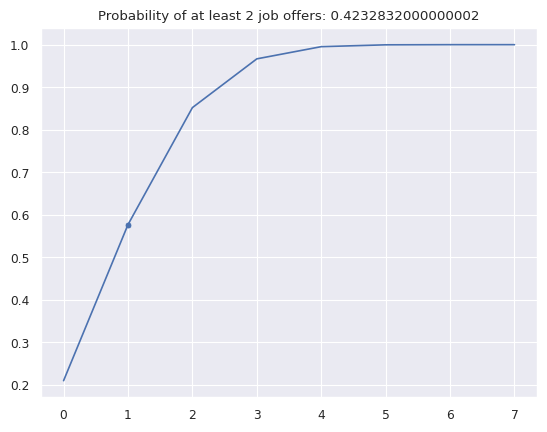

In [71]:
min_n = 2

# prob of at least min_n job offers 
p_at_least_min_n = 1 - dist_of_joboffers.cdf(min_n-1)
print(f"CDF @ N-1 = {dist_of_joboffers.cdf(min_n-1)}")
print(f"CDF @ N = {dist_of_joboffers.cdf(min_n)}")
print(p_at_least_min_n)
# plot of CDF with min_n-1 as a line 

sns.lineplot(x=range(n+1), y=dist_of_joboffers.cdf(range(n+1)))
sns.scatterplot(x=[min_n-1], y=[dist_of_joboffers.cdf(min_n-1)])
plt.title(f"Probability of at least {min_n} job offers: {p_at_least_min_n}")

# compute using pmf
p_at_least_min_n = 1 - sum(dist_of_joboffers.pmf(range(min_n)))
print(p_at_least_min_n)


## Beta Distribution

,p,pdf,cdf
0,0.000000,0.000000e+00,0.000000
1,0.010101,2.909709e-01,0.001490
2,0.020202,5.585502e-01,0.005799
3,0.030303,8.038064e-01,0.012698
4,0.040404,1.027779e+00,0.021966
...,...,...,...
95,0.959596,7.672005e-05,0.999999
96,0.969697,2.453023e-05,1.000000
97,0.979798,4.895950e-06,1.000000
98,0.989899,3.091515e-07,1.000000


P(X > 0.5): 0.109375


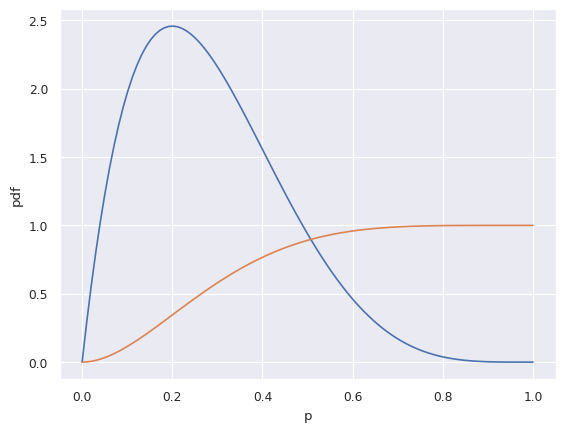

In [72]:
a, b = 2, 5 # alpha = count of successes, beta = count of failures
beta_dist = stats.beta(a, b)

p = np.linspace(0, 1, 100)
pdf = beta_dist.pdf(p)
cdf = beta_dist.cdf(p)

df = pd.DataFrame({'p': p, 'pdf': pdf, 'cdf': cdf})
display(df)

sns.lineplot(df, x='p', y='pdf')
sns.lineplot(df, x='p', y='cdf')

# Probability of X > 0.5
p_gt_half = 1 - beta_dist.cdf(0.5)
print(f"P(X > 0.5): {p_gt_half}")


1. You wnat to use the beta distribution to determine wheter or not a coun you have is a fair coin, meaining the coin gives heads and tails fairly. You flip the coin 10 times and get 4 heads and 6 tails. using thw beta distribution, what is the probability that the coin will land on heads more than 60 percent o the time?

Probability that coin will lands on hands more than 60%: 0.0994


<Axes: xlabel='p', ylabel='Density'>

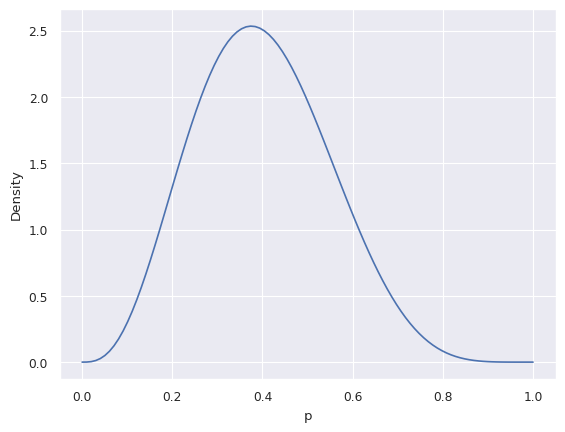

In [73]:
a, b = 4, 6
b_dist = stats.beta(a, b)

p_gt_60 = 1 - b_dist.cdf(0.6)
print(f"Probability that coin will lands on hands more than 60%: {p_gt_60:.4f}")

df = pd.DataFrame(
    {
        "p": np.linspace(0, 1, 100),
        "Density": b_dist.pdf(np.linspace(0, 1, 100)),
    }
)
sns.lineplot(df, x="p", y="Density")

You flip the coin 10 more times and now have 9H and 11T total. What is the probability that the coin is fair, using our definition of fair, give or take 5 percent?

In [74]:
a, b = 9, 11
b_dist_2 = stats.beta(a, b)

p_lt_45 = b_dist_2.cdf(0.45)
p_gf_55 = 1 - b_dist_2.cdf(0.55)
p_fair = 1 - p_lt_45 - p_gf_55

print(f"P(0.45<x<0.55) = {p_fair}")


P(0.45<x<0.55) = 0.30988001565130374


In [75]:
a, b = 109, 111
b_dist_3 = stats.beta(a, b)

p_lt_45 = b_dist_3.cdf(0.45)
p_gf_55 = 1 - b_dist_3.cdf(0.55)
p_fair = 1 - p_lt_45 - p_gf_55

print(f"P(0.45<x<0.55) = {p_fair}")


P(0.45<x<0.55) = 0.8589371426532763


<Axes: xlabel='p', ylabel='Density1'>

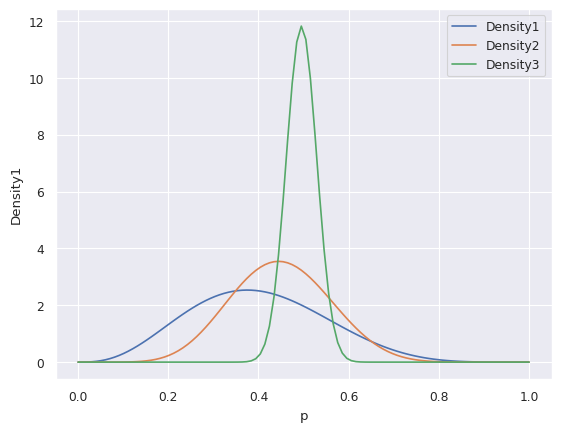

In [76]:
p = np.linspace(0, 1, 100)
df = pd.DataFrame(
    {
        "p": p,
        "Density1": b_dist.pdf(p),
        "Density2": b_dist_2.pdf(p),
        "Density3": b_dist_3.pdf(p),
    }
)

sns.lineplot(data=df, x="p", y="Density1", label="Density1")
sns.lineplot(data=df, x="p", y="Density2", label="Density2")
sns.lineplot(data=df, x="p", y="Density3", label="Density3")